In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/home/aditya/Downloads/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370904 entries, 0 to 370903
Data columns (total 18 columns):
CAMIS                    370904 non-null int64
DBA                      370327 non-null object
BORO                     370904 non-null object
BUILDING                 370740 non-null object
STREET                   370901 non-null object
ZIPCODE                  370901 non-null float64
PHONE                    370902 non-null object
CUISINE DESCRIPTION      370904 non-null object
INSPECTION DATE          370904 non-null object
ACTION                   369586 non-null object
VIOLATION CODE           364704 non-null object
VIOLATION DESCRIPTION    363352 non-null object
CRITICAL FLAG            370904 non-null object
SCORE                    350865 non-null float64
GRADE                    184547 non-null object
GRADE DATE               182129 non-null object
RECORD DATE              370904 non-null object
INSPECTION TYPE          369586 non-null object
dtypes: float64(2), int6

In [4]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41450085,VINNY VINCENZ,MANHATTAN,231,1 AVENUE,10003.0,2126740707,Pizza,03/14/2018,Establishment re-opened by DOHMH,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,P,03/14/2018,06/11/2018,Cycle Inspection / Reopening Inspection
1,50051339,SWELL DIVE,BROOKLYN,1013,BEDFORD AVE,11205.0,9176524779,Tex-Mex,01/11/2018,Establishment Closed by DOHMH. Violations wer...,04N,Filth flies or food/refuse/sewage-associated (...,Critical,55.0,NaN,NaN,06/11/2018,Cycle Inspection / Re-inspection
2,50009013,PARK ASIA RESTAURANT,BROOKLYN,801,66TH ST,11220.0,7188331688,Chinese,03/13/2015,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,18.0,NaN,NaN,06/11/2018,Cycle Inspection / Initial Inspection
3,41668615,FONTANA'S PASTA AND HEROS,BROOKLYN,2359,RALPH AVENUE,11234.0,7184444300,Italian,06/05/2018,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,13.0,A,06/05/2018,06/11/2018,Cycle Inspection / Initial Inspection
4,41546891,WAH KING KITCHEN,QUEENS,7915,ATLANTIC AVENUE,11421.0,7182969002,Chinese,02/26/2018,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,NaN,NaN,06/11/2018,Cycle Inspection / Initial Inspection


In [5]:
df.columns.tolist()

['CAMIS',
 'DBA',
 'BORO',
 'BUILDING',
 'STREET',
 'ZIPCODE',
 'PHONE',
 'CUISINE DESCRIPTION',
 'INSPECTION DATE',
 'ACTION',
 'VIOLATION CODE',
 'VIOLATION DESCRIPTION',
 'CRITICAL FLAG',
 'SCORE',
 'GRADE',
 'GRADE DATE',
 'RECORD DATE',
 'INSPECTION TYPE']

# missing Values 

In [6]:
df.isnull().sum()

CAMIS                         0
DBA                         577
BORO                          0
BUILDING                    164
STREET                        3
ZIPCODE                       3
PHONE                         2
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1318
VIOLATION CODE             6200
VIOLATION DESCRIPTION      7552
CRITICAL FLAG                 0
SCORE                     20039
GRADE                    186357
GRADE DATE               188775
RECORD DATE                   0
INSPECTION TYPE            1318
dtype: int64

# Score Analysis

In [7]:
df['SCORE'].describe()

count    350865.000000
mean         19.143024
std          13.409118
min          -2.000000
25%          11.000000
50%          14.000000
75%          24.000000
max         178.000000
Name: SCORE, dtype: float64

Text(0.5,0,'Score')

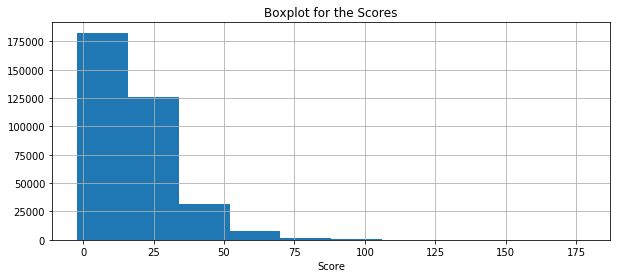

In [8]:
df.SCORE.hist(figsize=(10,4))
plt.title("Boxplot for the Scores")
plt.xlabel('Score')

# Grades Analysis

In [9]:
df.GRADE.value_counts()


A                 147517
B                  23254
C                   6213
Z                   3367
Not Yet Graded      2430
P                   1763
G                      3
Name: GRADE, dtype: int64

# Boroughs Analysis¶

In [10]:
df.BORO.value_counts()

MANHATTAN        147332
BROOKLYN          94717
QUEENS            83048
BRONX             33118
STATEN ISLAND     12671
Missing              18
Name: BORO, dtype: int64

# Contingency table for Grade and Borough

In [11]:
boro_grade = pd.crosstab(df.GRADE, df.BORO, margins = True)
boro_grade

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,All
GRADE,,,,,,,
A,13334,36345,58940,6,33807,5085,147517
B,2402,6021,8781,0,5223,827,23254
C,663,1578,2526,0,1277,169,6213
G,0,0,3,0,0,0,3
Not Yet Graded,208,713,890,0,526,93,2430
P,180,551,619,0,363,50,1763
Z,278,932,1281,0,785,91,3367
All,17065,46140,73040,6,41981,6315,184547


# Plot of grade by borough

Text(0.5,1,'Grade Distribution by Borough')

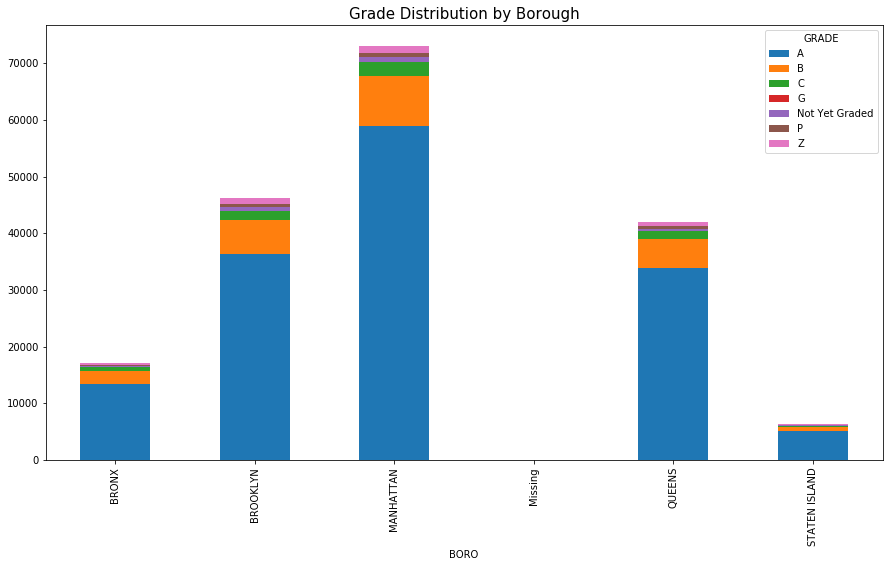

In [12]:

pd.crosstab(df.BORO, df.GRADE).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Grade Distribution by Borough', fontsize = 15)


# Cuisine Analysis

In [13]:
df['CUISINE DESCRIPTION'].value_counts()


American                                                            82508
Chinese                                                             38313
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16827
Pizza                                                               16572
CafÃ©/Coffee/Tea                                                    16336
Italian                                                             15995
Mexican                                                             14459
Japanese                                                            13256
Caribbean                                                           12698
Bakery                                                              11199
Spanish                                                             10921
Pizza/Italian                                                        8042
Chicken                                                              6252
Indian                                

# Action Taken Analysis

In [14]:
df.ACTION.value_counts()

Violations were cited in the following area(s).                                                                                        349653
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.     10717
No violations were recorded at the time of this inspection.                                                                              4833
Establishment re-opened by DOHMH                                                                                                         3168
Establishment re-closed by DOHMH                                                                                                         1215
Name: ACTION, dtype: int64

# Critical Flag Analysis

In [15]:
df['CRITICAL FLAG'].value_counts()

Critical          202954
Not Critical      160398
Not Applicable      7552
Name: CRITICAL FLAG, dtype: int64

# Critical Flag by Borough

Text(0.5,1,'Critical Flag by Borough')

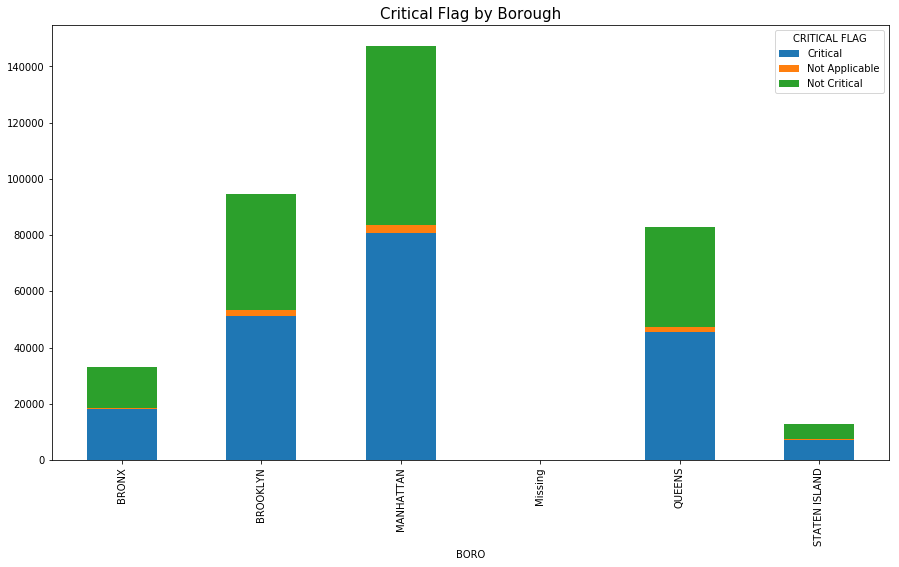

In [16]:
pd.crosstab(df.BORO, df['CRITICAL FLAG']).plot(kind="bar", figsize=(15,8), stacked=True)
plt.title('Critical Flag by Borough', fontsize = 15)

# Inspection

In [17]:
df['INSPECTION TYPE'].value_counts()

Cycle Inspection / Initial Inspection                          217406
Cycle Inspection / Re-inspection                                87406
Pre-permit (Operational) / Initial Inspection                   24179
Pre-permit (Operational) / Re-inspection                        10270
Administrative Miscellaneous / Initial Inspection                7210
Cycle Inspection / Reopening Inspection                          3811
Pre-permit (Non-operational) / Initial Inspection                3653
Smoke-Free Air Act / Initial Inspection                          3322
Administrative Miscellaneous / Re-inspection                     2354
Trans Fat / Initial Inspection                                   2343
Cycle Inspection / Compliance Inspection                         1234
Calorie Posting / Initial Inspection                             1022
Smoke-Free Air Act / Re-inspection                                981
Inter-Agency Task Force / Initial Inspection                      956
Pre-permit (Operatio